# Building sentiment review using LSTM on Keras
classify reviews from IMDB based on sentiment that comes with keras 
Data is already preprocessed

In [3]:
from keras.preprocessing import sequence
from keras.models import Sequential 
from keras.layers import Dense, Embedding, LSTM
from keras.callbacks import EarlyStopping
from keras.datasets import imdb

In [5]:
num_word = 6000 #the topmost n frequent wordsto consider 

In [12]:
skip_top = 0
max_review_len = 400

In [31]:
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [32]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_word, skip_top = skip_top)

In [48]:
np.load = np_load_old # restore np.load for future normal usage

In [33]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 2, 78, 228, 5, 6,

Vectors of number representing words

In [34]:
# padding review vector if its short 
# Truncating review vector if its short
X_train = sequence.pad_sequences(X_train, maxlen = max_review_len)
X_test = sequence.pad_sequences(X_test, maxlen = max_review_len)

In [22]:
X_train

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]], dtype=int32)

In [35]:
model = Sequential()
model.add(Embedding(num_word, 64))
model.add(LSTM(128)) #128 output from this layer 
model.add(Dense(1, activation = 'sigmoid'))


In [76]:
#Compile the model
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [77]:
#Train
BATCH_SIZE = 24
EPOCHS = 5

In [78]:
cbk_early_stopping = EarlyStopping(monitor = 'val_acc', mode = 'max')

In [87]:
hist = model.fit(X_train, y_train, BATCH_SIZE, 
          epochs = EPOCHS, 
          validation_data = (X_test, y_test),
          callbacks = [cbk_early_stopping]) 

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 787s 31ms/step - loss: 0.1509 - acc: 0.9431 - val_loss: 0.4405 - val_acc: 0.8633
Epoch 2/5
25000/25000 [==============================] - 705s 28ms/step - loss: 0.1203 - acc: 0.9564 - val_loss: 0.4083 - val_acc: 0.8604


In [88]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('test loss', score[0])
print('test accuracy', score[1])

test loss 0.4082718191242218
test accuracy 0.86036


In [89]:
import matplotlib.pyplot as plt

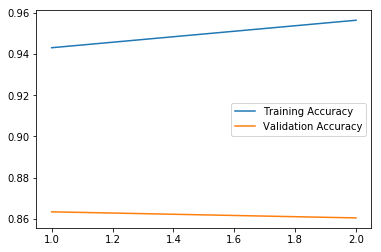

In [91]:
epoch_list = list(range(1, len(hist.history['acc']) + 1))
plt.plot(epoch_list, hist.history['acc'], epoch_list, hist.history['val_acc'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()